In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
import rail
import qp
from rail.core.data import TableHandle
from rail.core.stage import RailStage

from rail_inception import Inform_Inception, Inception

In [2]:
DS = RailStage.data_store
DS.__class__.allow_overwrite = True

In [3]:
inc_dict = dict(trainfrac=0.75,
                epoch=10,
                hdf5_groupname='photometry')

In [4]:
inform = Inform_Inception.make_stage(name='Inform_Inception', model='demo_inc.pkl', **inc_dict)

### Preparation

In [5]:
img = np.load('/global/cfs/cdirs/lsst/groups/PZ/valentin_image_data_temp/img_30k.npy')
z = np.load('/global/cfs/cdirs/lsst/groups/PZ/valentin_image_data_temp/z_30k.npy')

In [6]:
img.shape

(30000, 64, 64, 5)

In [7]:
img = img.reshape((-1, 64*64*5))
img.shape

(30000, 20480)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


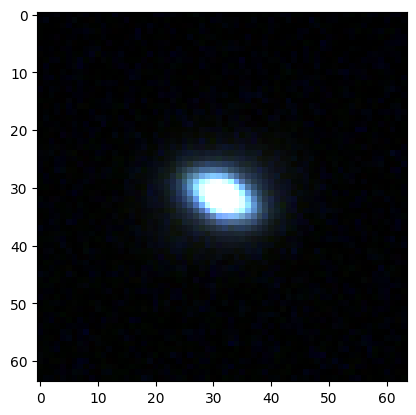

In [8]:
# Check the unflatten step
img_0 = img[1].reshape((64, 64, 5))
plt.imshow(img_0[..., 2:5]);

In [9]:
z = z.reshape((-1,1))
train_data = np.concatenate((z[:20000], img[:20000]), axis = 1)
test_data = np.concatenate((z[20000:], img[20000:]), axis = 1)

In [10]:
test_data.shape

(10000, 20481)

In [11]:
training = DS.add_data("training", train_data, TableHandle)

In [12]:
training

In [13]:
testing = DS.add_data("testing", test_data, TableHandle)

### Training & Results

[0.027201409605145454, 0.015744634598493575, 0.026313209802657365, 0.042334038832783694, 0.13110969055742025]
Split into 15000 training and 5000 validation samples
Model training:
Epoch 1/10
234/234 [==============================] - 13s 36ms/step - loss: 0.2185 - val_loss: 0.0017 - lr: 0.0010
Epoch 2/10
234/234 [==============================] - 8s 32ms/step - loss: 0.0015 - val_loss: 0.0014 - lr: 9.0000e-04
Epoch 3/10
234/234 [==============================] - 8s 32ms/step - loss: 0.0013 - val_loss: 0.0018 - lr: 8.1000e-04
Epoch 4/10
234/234 [==============================] - 8s 32ms/step - loss: 0.0012 - val_loss: 0.0014 - lr: 7.2900e-04
Epoch 5/10
234/234 [==============================] - 8s 32ms/step - loss: 0.0010 - val_loss: 0.0010 - lr: 6.5610e-04
Epoch 6/10
234/234 [==============================] - 8s 32ms/step - loss: 8.8264e-04 - val_loss: 9.3353e-04 - lr: 5.9049e-04
Epoch 7/10
234/234 [==============================] - 8s 32ms/step - loss: 8.8471e-04 - val_loss: 0.0010 - 

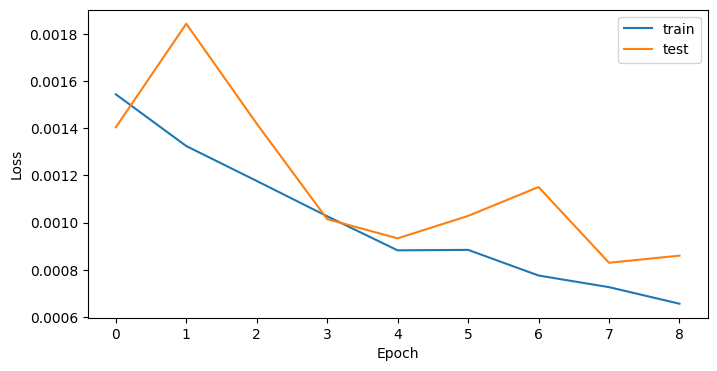

Inserting handle into data store.  model_Inform_Inception: inprogress_demo_inc.pkl, Inform_Inception


INFO:tensorflow:Assets written to: ram://0df66933-1a9b-4ef2-88bc-189ce8d32f24/assets


INFO:tensorflow:Assets written to: ram://0df66933-1a9b-4ef2-88bc-189ce8d32f24/assets


In [14]:
inform.inform(training)

In [15]:
incept = Inception.make_stage(name='Inception', hdf5_groupname='photometry',
                              model=inform.get_handle('model'))

313/313 [==============================] - 2s 6ms/step
Prediction bias: 0.0008


<IPython.core.display.Latex object>

Outlier fraction: 4.28%


KeyError: 'Inception failed to get data by handle output_Inception, associated to output'

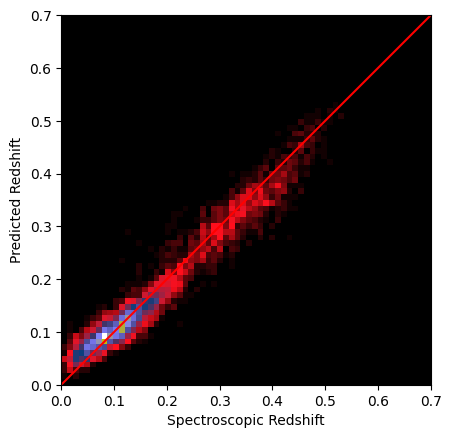

In [16]:
results = incept.estimate(testing)